# Project Milestone 1: Data Selection and EDA  

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Found and imported dataset, set up outline.  
Date of Change:  10/7/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022  

Change#: 2
Change(s) Made:  Wrote introduction.  
Date of Change:  10/8/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022  

Change#: 3
Change(s) Made:  Created and analyzed graphs.  
Date of Change:  10/8/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022  

- ***Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem.***

In this analysis I will be discussing the creation of a model that predicts the medical insurance premium of an individual based on factors related to the physical health and condition of the individual. The variables ‘Age’, ‘Height’, ‘Weight’ and 'NumberOfMajorSurgeries'  are numeric variables, while 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', and 'HistoryOfCancerInFamily' are binary categorical variables. The target feature is ‘PremiumPrice’ which is a numerical variable as well. This data was provided by the individuals themselves and was given voluntarily.  

I will start this analysis by making some scatterplots between features and the target to see if there is any obvious correlation between them. I plan to use a random forest regressor to model, so I will need to find the importance of each feature and use that to do feature selection. I know that random forests are typically used in classification problems, but I felt that I needed practice with this sort of model. I also need to handle any imbalanced classes so I should look at the size of each class being used. Then I can create the model using selected features and weighted classes. I plan to evaluate the model using out-of-bag errors.  

This is a relevant business problem to those who, for example, work for the Health Insurance Marketplace in the United States government. This organization provides a comparison tool to help users shop for health insurance. In order to give users an accurate idea of how much they might pay for insurance premiums at a particular insurance company, we can build a model to predict that cost. This allows users to voluntarily enter anonymized health data to predict their cost and accurately compare insurance products. It could also be helpful in the efforts of those trying to socialize healthcare in the United States, because it can be shown how much more costly private insurance premiums are compared to the tax increase one would get under a Medicare-for-all type of infrastructure. 

- ***Clearly identify the problem you will address and the target for your model.***

I will be addressing the question of whether the selected features above can be used to generate a mdoel that predicts premium price using a random forest regressor model.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('Medicalpremium_dataset.csv')

In [3]:
# view sample of dataset
print(df.shape)
print(df.head(3))

(986, 11)
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  


- ***Then, do a graphical analysis creating a minimum of four graphs.***
- ***Label your graphs appropriately and explain/analyze the information provided by each graph.***

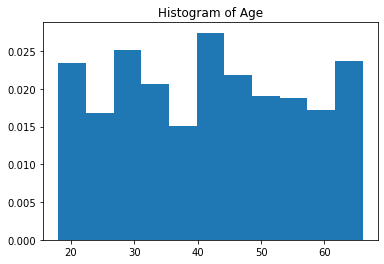

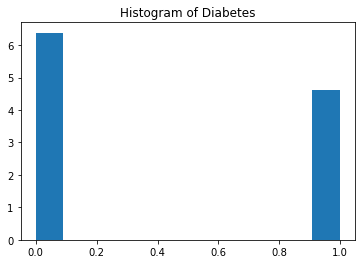

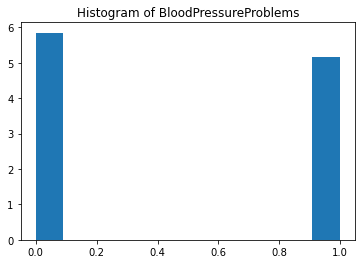

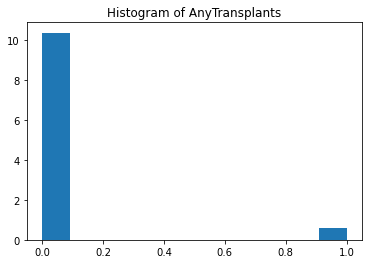

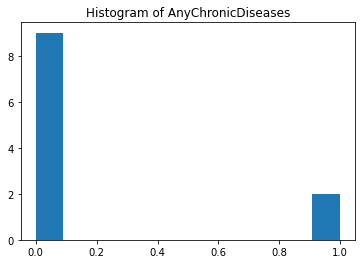

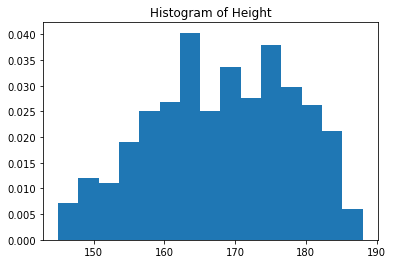

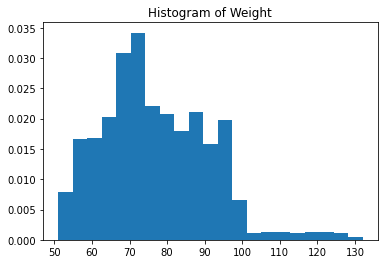

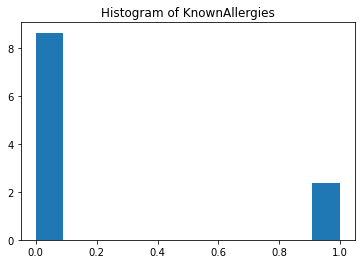

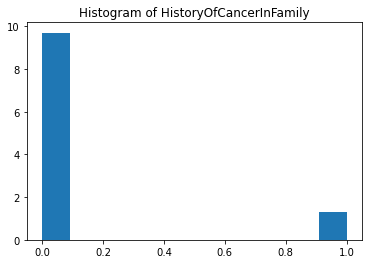

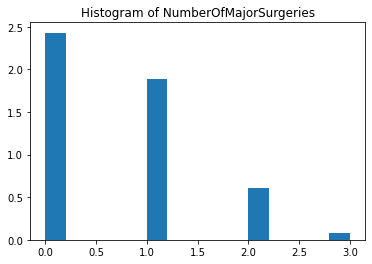

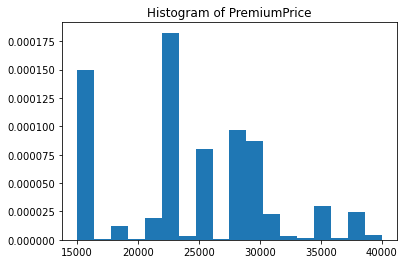

In [4]:
# make histograms for each feature
for column in df:
    plt.title("Histogram of " + column)
    plt.hist(df[column], bins='auto', density=True)
    plt.show()

These histograms give us information about how our classes are weighted, and whether there are any visible outliers in the data. Age, Diabetes, BloodPressureProblems, and height all seem to be weighted relatively well. However, AnyTransplants, AnyChronicDiseases, Weight, KnownAllergies, CancerinFamily and NumberofMajorSurgeries are imbalanced classes. No series outliers for nay of the features.

<AxesSubplot:>

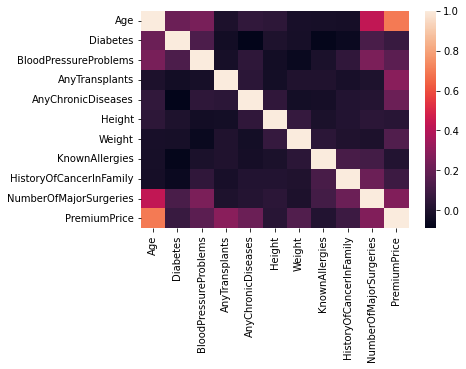

In [5]:
# correlation heat map
sns.heatmap(df.corr())

Here we can see that the variable with the strongest correlation to PremiumPrice is Age. None of other variables are even close to the correlation that Age has. 

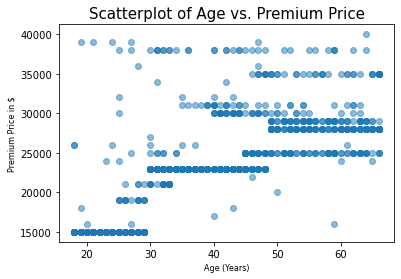

In [6]:
# Scatterplots of all variables that are not categorical
# Age vs. Premium
plt.scatter(df['Age'], df['PremiumPrice'], alpha=0.5)
plt.title(f"Scatterplot of Age vs. Premium Price", fontsize = 15)
plt.ylabel("Premium Price in $", fontsize = 8)
plt.xlabel(f'Age (Years)', fontsize = 8)
plt.show()

We can see that this correlation is still apparent when just looking at the scatterplot of PremiumPrice vs. Age. 

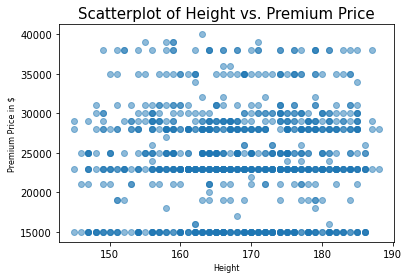

In [7]:
# Scatterplot of Height vs Premium
plt.scatter(df['Height'], df['PremiumPrice'], alpha=0.5)
plt.title(f"Scatterplot of Height vs. Premium Price", fontsize = 15)
plt.ylabel("Premium Price in $", fontsize = 8)
plt.xlabel(f'Height', fontsize = 8)
plt.show()

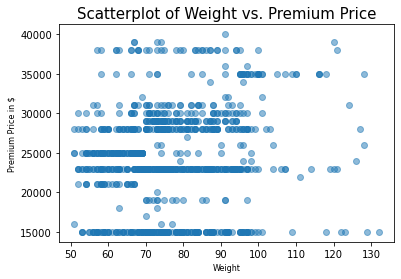

In [8]:
#Scatterplot of Weight vs premium
plt.scatter(df['Weight'], df['PremiumPrice'], alpha=0.5)
plt.title(f"Scatterplot of Weight vs. Premium Price", fontsize = 15)
plt.ylabel("Premium Price in $", fontsize = 8)
plt.xlabel(f'Weight', fontsize = 8)
plt.show()

- ***Write a short overview/conclusion of the insights gained from your graphical analysis.***

In conclusion, the histograms showed us which classes are balanced and which are imbalanced. They also showed us that outliers aren't an issue in this dataset. The correlation showed us that there are features which are promising in model creation to predict PremiumPrice. And The only scatterplot that had any sort of apparent correlation was the scatterplot of Age vs. Premium Price.

# Project Milestone 2: Data Preparation

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  
Date of Change:  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/23/2022  

***Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model building/evaluation phase.***

***Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.***

In [9]:
# Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

***Engineer new useful features.***

In [10]:
# BMI would be useful to calculate where BMI = weight (lb) / [height (in)]2 x 703
df['BMI'] = df['Weight']/(df['Height'])**2*703

In [11]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,1.667888
1,60,1,0,0,0,180,73,0,0,0,29000,1.583920
2,36,1,1,0,0,158,59,0,0,1,23000,1.661473
3,52,1,1,0,1,183,93,0,0,2,28000,1.952253
4,38,0,0,0,1,166,88,0,0,1,23000,2.245028


***Deal with missing data (do not just drop rows or columns without justifying this).***

In [12]:
df.isna().sum()
# There is no missing data, yay!

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
BMI                        0
dtype: int64

***Create dummy variables if necessary.***

I was going to make dummy variables for each of the binary categorical variables in my dataset. But I realized that this is mathematically eequivalent to just keeping the binary columns the way they are, with half as many variables than we would have if we made redundant dummy variables.

***Perform any data extraction/selection steps.***

In [13]:
# Seperate target feature and training features
x = df.drop('PremiumPrice', axis = 1)
y = df['PremiumPrice']

In [14]:
# Training and testing Split
x_train, x_test, y_train, y_test = train_test_split(x,y)

***Transform features if necessary.***

In [15]:
# Standardize feature matrix
scaler = StandardScaler()
features = scaler.fit_transform(x_train, y_train)
test_features = scaler.transform(x_test)

***Drop any features that are not useful for your model building and explain why they are not useful.***

We won't be dropping any features for this model building exercise because the Random Forest Regressor has intrinsic feature selection. Feature selection can be further narrowed down after a model has been built and evaluated using SelectFromModel(RandomForest)

# Project Milestone 3: Model Building and Evaluation

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Started Model Building.  
Date of Change:  11/5/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 11/6/2022  

### Hyperparameter Tuning

Here we will find the max_features and n_estimators in order to optimize our random forest regressor.

In [16]:
# Libraries 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [17]:
# Create a pipeline to use in searching for optimal model
pipe = Pipeline([("classifier", RandomForestClassifier())])

In [18]:
# Create dictionary with candidate learning algorithm and their hyperparameters
search_space = [
 {"classifier": [RandomForestRegressor()],
 "classifier__n_estimators": [10, 100, 1000],
 "classifier__max_features": [1, 2, 3, 4, 5]}]

In [19]:
# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [20]:
best_model = gridsearch.fit(features,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [21]:
# View best model
model = best_model.best_estimator_.get_params()["classifier"]
model

RandomForestRegressor(max_features=5, n_estimators=1000)

It appears that our best random forest regression model will have max_features = 5 and n_estimators = 1000.

### Model Building

Now that we have our hyperparameters tuned, we will build a random forest regressor model.

In [22]:
# create regressor object
regressor = RandomForestRegressor(max_features=5, n_estimators=1000, oob_score=True)

In [23]:
# Fit the regressor
regressor.fit(features, y_train)

RandomForestRegressor(max_features=5, n_estimators=1000, oob_score=True)

In [24]:
# Make predictions on test data
y_pred = regressor.predict(test_features)

### Evaluate Model

In [25]:
# Out of bag score:
regressor.oob_score_

0.7942981340348321

In [26]:
from sklearn import metrics

In [27]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [28]:
print(f'The MAE value is: {mae}.\n')
print(f'The MSE value is: {mse}.\n')
print(f'The RMSE value is: {rmse}.\n')

The MAE value is: 1393.7246963562752.

The MSE value is: 8004740.016194332.

The RMSE value is: 2829.2649250634577.



I used a grid search with a random forest classifier to perform hyperparameter tuning of my model. That hyperparamter tuning yeilded results, (specifically max_features = 5 and n_estimators=1000, ) which allowed me to optimally fit a radnom forest regressor model onto the data. I chose a random forest regressor because I needed to use a regression model, since I am predicting values not classifying. And random forest regressors are the types of regressors I have the least knowledge of any type of regression we have seen so far. For evaluating the model, I inluded out-of-bag errors as well as MAE, MSE, and RMSE scores. I provided all of these metrics because they are all available to regression models. I did not include R2 because this is not a linear regression. I do think that OOB errors is the best way to evaluate this model, and the model seems to have an OOB score of approximately 80%.